creating tables

In [40]:
import pandas as pd 
import numpy as np
import sqlite3

connect = sqlite3.connect('./Data/climate_data.db')
cursor = connect.cursor()

dftemperature = pd.read_csv('./Data/Annual temperature rateclean.csv', low_memory=False)
dfprecipitation = pd.read_csv('./Data/Annual precipitation rateclean.csv', low_memory=False)
dfevolutionpolicies = pd.read_csv("./Data/evolution of policyclean.csv", low_memory=False)

In [41]:
cursor.execute('''
CREATE TABLE OECD_Total_Temperature (
    year INT PRIMARY KEY,
    temperature FLOAT
)
''')

OperationalError: table OECD_Total_Temperature already exists

In [ ]:
cursor.execute('''
CREATE TABLE EU_Precipitation (
    year INT PRIMARY KEY,
    precipitation FLOAT
)
''')

OperationalError: table EU_Precipitation already exists

In [ ]:
cursor.execute('''
CREATE TABLE Climate_Policies (
    year INT PRIMARY KEY,
    number_of_policies_adopted INT,
    number_of_measured_policies INT
)
''')

OperationalError: table Climate_Policies already exists

In [ ]:
cursor.execute('''
CREATE TABLE Climate_Data (
    year INT PRIMARY KEY,
    temperature FLOAT,
    precipitation FLOAT,
    policies INT
)
''') 

conn.commit()
conn.close()

OperationalError: table Climate_Data already exists

In [ ]:
# dftemperature.to_sql('OECD_Total_Temperature', connect, if_exists='replace', index=False)
# dfprecipitation.to_sql('EU_Precipitation', connect, if_exists='replace', index=False)
# dfevolutionpolicies.to_sql('Climate_Policies', connect, if_exists='replace', index=False)

44

In [ ]:
for index, row in dftemperature.iterrows(): 

    cursor.execute(f'SELECT exists(SELECT 1 FROM Climate_Data WHERE year = {row["year"]}) AS row_exists')
    exists = cursor.fetchone()[0]

    if not exists: 
        
        cursor.execute(f'INSERT INTO Climate_Data (year, temperature) VALUES ({row["year"]}, "{row["temperature"]}");')
        connect.commit()

    cursor.execute(f'UPDATE Climate_Data SET temperature = {row["temperature"]} WHERE year = {row["year"]};')
    connect.commit()


for index, row in dfprecipitation.iterrows(): 

    cursor.execute(f'UPDATE Climate_Data SET precipitation = {row["precipitation"]} WHERE year = {row["year"]};')
    connect.commit()

for index, row in dfevolutionpolicies.iterrows(): 

    cursor.execute(f'UPDATE Climate_Data SET policies = {row["Number of policies adopted"]} WHERE year = {row["year"]};')
    connect.commit()

connect.close()

In [42]:
cursor.execute('DELETE FROM Climate_Data WHERE policies IS NULL')
connect.commit()

In [1]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sqlite3
import pandas as pd


# Connect to the SQLite database
connect = sqlite3.connect('./Data/climate_data.db')

# Load data into DataFrames
df_temperature = pd.read_sql_query('SELECT * FROM OECD_Total_Temperature', connect)
df_precipitation = pd.read_sql_query('SELECT * FROM EU_Precipitation', connect)
df_policies = pd.read_sql_query('SELECT * FROM Climate_Policies', connect)

connect.close()


c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

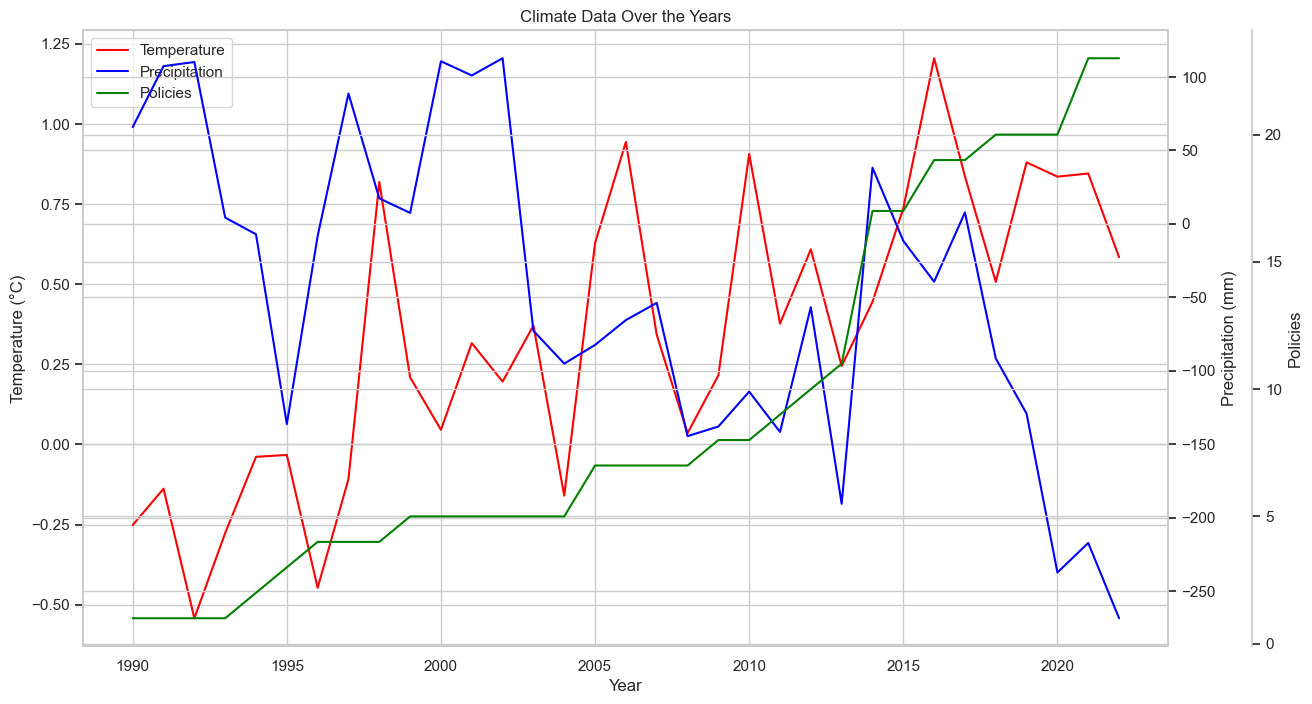

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database and load data into DataFrames
conn = sqlite3.connect('./Data/climate_data.db')
df_climate = pd.read_sql_query('SELECT * FROM Climate_Data', conn)
conn.close()

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Temperature
line1 = sns.lineplot(data=df_climate, x='year', y='temperature', ax=ax1, color='red')
line1.set_label('Temperature')

# Create a second y-axis for the Precipitation
ax2 = ax1.twinx()
line2 = sns.lineplot(data=df_climate, x='year', y='precipitation', ax=ax2, color='blue')
line2.set_label('Precipitation')

# Create a third y-axis for the Policies (using ax1)
ax3 = ax1.twinx()

# Offset the third y-axis to the right
ax3.spines["right"].set_position(("outward", 60))
line3 = sns.lineplot(data=df_climate, x='year', y='policies', ax=ax3, color='green')
line3.set_label('Policies')

# Set labels
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (°C)')
ax2.set_ylabel('Precipitation (mm)')
ax3.set_ylabel('Policies')

# Set title
plt.title('Climate Data Over the Years')

# Combine legends from all axes manually
lines = [line1.lines[0], line2.lines[0], line3.lines[0]]
labels = [line1.get_label(), line2.get_label(), line3.get_label()]
ax1.legend(lines, labels, loc='upper left')

# Show the plot
plt.show()
